In [1]:
# Check nvcc version
!nvcc -V
# Check GCC version
!gcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Wed_Oct_23_19:32:27_Pacific_Daylight_Time_2019
Cuda compilation tools, release 10.2, V10.2.89
gcc (Rev5, Built by MSYS2 project) 5.3.0
Copyright (C) 2015 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [4]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())

import torchvision
print(torchvision.__version__)

1.8.0+cu111
True
0.9.0+cu111


In [5]:
# install dependencies: (use cu111 because CUDA 11.1)
!pip install -U torch==1.8.0+cu111 torchvision==0.9.0+cu111 -f https://download.pytorch.org/whl/torch_stable.html

# install mmcv-full thus we could use CUDA operators
!pip install mmcv-full==1.3.17 -f https://download.openmmlab.com/mmcv/dist/cu111/torch1.8.0/index.html


# Install mmdetection
!rm -rf mmdetection
!git clone https://github.com/open-mmlab/mmdetection.git
%cd mmdetection

!pip install -e .

# install Pillow 7.0.0 back in order to avoid bug in colab
!pip install Pillow==7.0.0

Looking in links: https://download.pytorch.org/whl/torch_stable.html
Looking in links: https://download.openmmlab.com/mmcv/dist/cu111/torch1.8.0/index.html
  Using cached mmcv-full-1.3.17.tar.gz (390 kB)
  Running setup.py clean for mmcv-full
Failed to build mmcv-full
    Running setup.py install for mmcv-full: started
    Running setup.py install for mmcv-full: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\Lab620\Anaconda3\envs\VRDL\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Lab620\\AppData\\Local\\Temp\\pip-install-srg65dt6\\mmcv-full_90e66caf2d29408c871b15191ac303d2\\setup.py'"'"'; __file__='"'"'C:\\Users\\Lab620\\AppData\\Local\\Temp\\pip-install-srg65dt6\\mmcv-full_90e66caf2d29408c871b15191ac303d2\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Lab620\AppData\Local\Temp\pip-wheel-bc7aj9ca'
       cwd: C:\Users\Lab620\AppData\Local\Temp\pip-install-srg65dt6\mmcv-full_90e66caf2d29408c871b15191ac303d2\
  Complete output (3065 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\

c:\Users\Lab620\Documents\GitHub\2021_VRDL_HW2\src\mmdetection\mmdetection\mmdetection


Cloning into 'mmdetection'...


Obtaining file:///C:/Users/Lab620/Documents/GitHub/2021_VRDL_HW2/src/mmdetection/mmdetection/mmdetection
  Attempting uninstall: mmdet
    Found existing installation: mmdet 2.18.1
    Uninstalling mmdet-2.18.1:
      Successfully uninstalled mmdet-2.18.1
  Running setup.py develop for mmdet


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from dataset import TrainDataset

In [2]:
def test_dataset():
    mat_path = os.path.join('..', 'data', "train answer", 'digitStruct.mat')
    print(mat_path)
    image_dir = os.path.join('..', 'data', 'train')

    dataset = TrainDataset(mat_path, image_dir)

    count = 1
    for (name, bbox), image in dataset:
        fig, ax = plt.subplots()
        ax.imshow(image)
        ax.set_title(
            ' '.join([name, ' '.join(np.array(bbox['label']).astype(str))]))

        for i in range(len(bbox['label'])):
            print(i)
            x, y = bbox['left'][i], bbox['top'][i]
            height, width = bbox['height'][i], bbox['width'][i]
            print(x, y, height, width)
            rect = patches.Rectangle((x, y), width, height, linewidth=1,
                                     edgecolor='r', facecolor='none')
            ax.add_patch(rect)
        plt.show()
        if count > 3:
            break
        count += 1

..\data\train answer\digitStruct.mat
0
246.0 77.0 219.0 81.0
1
323.0 81.0 219.0 96.0


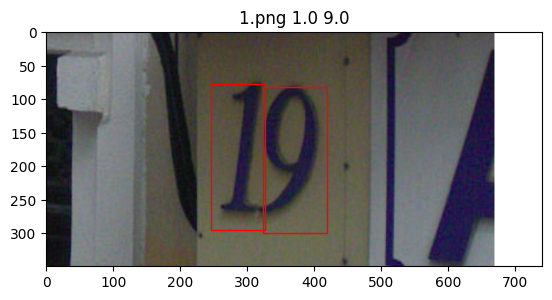

0
77.0 29.0 32.0 23.0
1
98.0 25.0 32.0 26.0


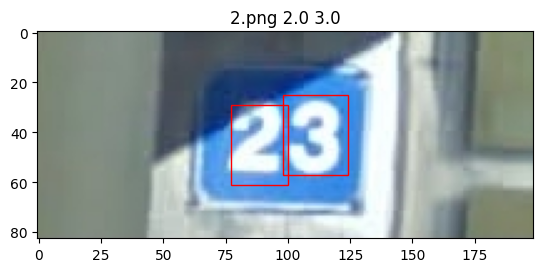

0
17.0 5.0 15.0 8.0
1
25.0 5.0 15.0 9.0


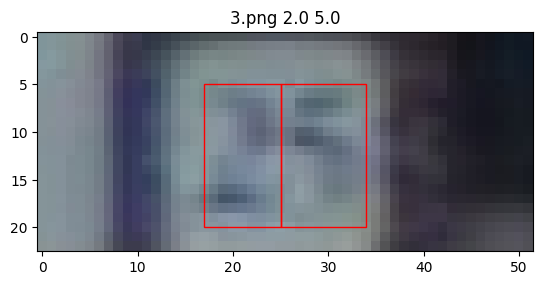

0
57.0 13.0 34.0 15.0
1
72.0 13.0 34.0 13.0


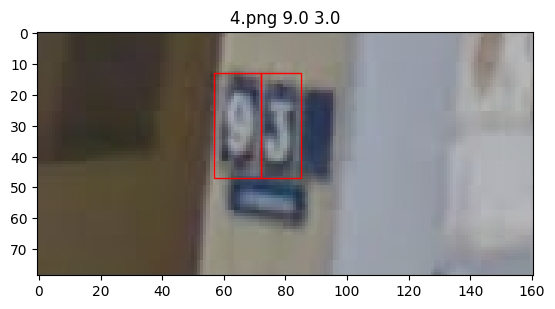

In [3]:
test_dataset()